### <font color = blue>Problem Statement:
<font color = green>Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

<font color = green>**HR Analytics**

<font color = green>Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

<font color = green>**Attrition in HR**

<font color = green>Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

<font color = green>How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### <font color = blue> Importing Required Library

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
pd.set_option("display.max_columns", None) # For display maximum column
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score,plot_roc_curve,roc_curve
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### <font color = blue>Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\csv file\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### <font color = blue>Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (1470, 35)


### <font color = blue>Checking for Null values

In [4]:
print('----------------------\n')
print(df.isnull().sum())
print('\n----------------------')

----------------------

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRo

#### <font color = green>There is no null value

### <font color = blue> Information about dataset

In [5]:
print('----------------------------------------------------\n')
print(df.info())
print('----------------------------------------------------')

----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement          

#### <font color = green>Categorical data present in our data set

### <font color = blue> Statistics of Data

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### <font color = green>Data is looking good so far 

### <font color = blue>Checking Class Imbalence

In [7]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

#### <font color = green> Class is not balanced

### <font color = blue>Analysis of Attrition

In [8]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [9]:
ag = df['Age'].value_counts()
ag

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

### <font color = blue>Apply label encoder on Attrition column

In [10]:
le = LabelEncoder()

In [11]:
df['Attrition'] = le.fit_transform(df['Attrition'])
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [12]:
df['Attrition'].dtype

dtype('int32')

#### <font color = green>Attrition column encoded

In [13]:
a = df.groupby('Age')['Attrition'].sum().sort_values()
a

Age
60     0
57     0
54     0
59     0
42     2
43     2
45     2
48     2
49     2
53     2
51     2
38     2
27     3
52     3
47     3
55     3
56     3
46     4
18     4
23     4
58     5
40     5
22     5
50     5
37     6
19     6
20     6
21     6
25     6
36     6
39     6
44     6
41     6
24     7
30     9
34     9
35    10
32    11
26    12
33    12
28    14
31    18
29    18
Name: Attrition, dtype: int32

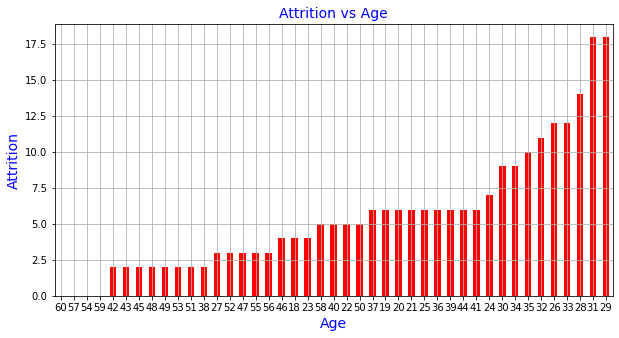

In [14]:
a.plot.bar(x = 'Age', y = 'Attrition', figsize = (10,5), rot = 360, color = 'r', fontsize = 10)
plt.ylabel('Attrition',fontsize = 14, color = 'b')
plt.xlabel('Age',fontsize = 14, color = 'b')
plt.title('Attrition vs Age',fontsize = 14, color = 'b')
plt.grid()
plt.show()

#### <font color = green>Above graph shows Age 29 to 31 highest Attrition and 43 to 42 lowest Attrition

### <font color = blue>Business Travel column

In [15]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [16]:
b = df.groupby('BusinessTravel')['Attrition'].sum()
b

BusinessTravel
Non-Travel            12
Travel_Frequently     69
Travel_Rarely        156
Name: Attrition, dtype: int32

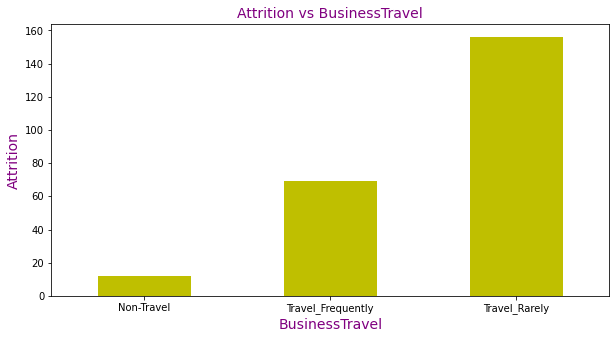

In [17]:
b.plot.bar(x = 'BusinessTravel', y = 'Attrition', figsize = (10,5), rot = 360, color = 'y', fontsize = 10)
plt.ylabel('Attrition',fontsize = 14, color = 'purple')
plt.xlabel('BusinessTravel',fontsize = 14, color = 'purple')
plt.title('Attrition vs BusinessTravel',fontsize = 14, color = 'purple')
plt.show()

#### <font color = green>Above graph shows who Travel Rarely got highest Attrition

### <font color = blue> Encode Business Travel column

In [18]:
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [19]:
df['BusinessTravel'].dtype

dtype('int32')

#### <font color = green>Encoded Business Travel column

### <font color = blue> Department column

In [20]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [21]:
c = df.groupby('Department')['Attrition'].sum()
c

Department
Human Resources            12
Research & Development    133
Sales                      92
Name: Attrition, dtype: int32

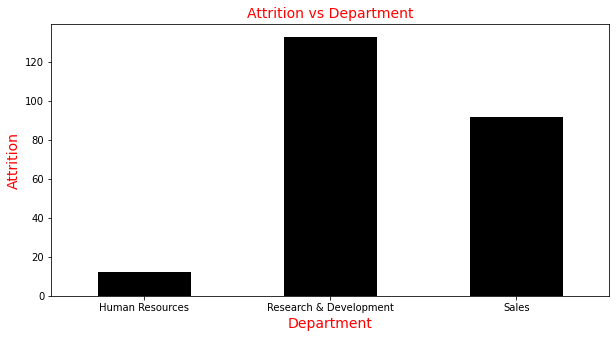

In [22]:
c.plot.bar(x = 'Department', y = 'Attrition', figsize = (10,5), rot = 360, color = 'black', fontsize = 10)
plt.ylabel('Attrition',fontsize = 14, color = 'r')
plt.xlabel('Department',fontsize = 14, color = 'r')
plt.title('Attrition vs Department',fontsize = 14, color = 'r')
plt.show()

#### <font color = green>Above graph shows Research & Development Department highest Attrition

### <font color = blue>Encode Department column

In [23]:
df['Department'] = le.fit_transform(df['Department'])
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [24]:
df['Department'].dtype

dtype('int32')

#### <font color = green>Encoded Department column

### <font color = blue>Education column

In [25]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [26]:
d = df.groupby('Education')['Attrition'].sum().sort_values()
d

Education
5     5
1    31
2    44
4    58
3    99
Name: Attrition, dtype: int32

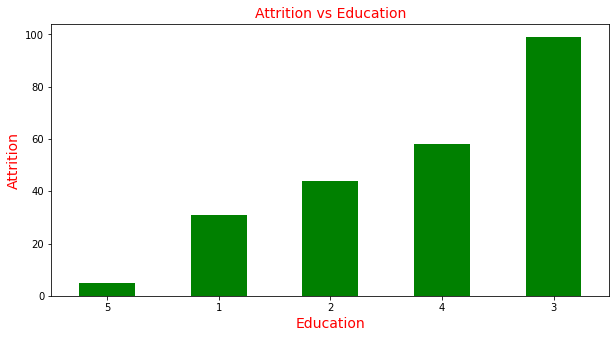

In [27]:
d.plot.bar(x = 'Education', y = 'Attrition', figsize = (10,5), rot = 360, color = 'g', fontsize = 10)
plt.ylabel('Attrition',fontsize = 14, color = 'r')
plt.xlabel('Education',fontsize = 14, color = 'r')
plt.title('Attrition vs Education',fontsize = 14, color = 'r')
plt.show()

#### <font color = green>Above graph shows who has 3 Education degree highest Attrition

### <font color = blue>Gender column

In [28]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [29]:
e = df.groupby('Gender')['Attrition'].sum()
e

Gender
Female     87
Male      150
Name: Attrition, dtype: int32

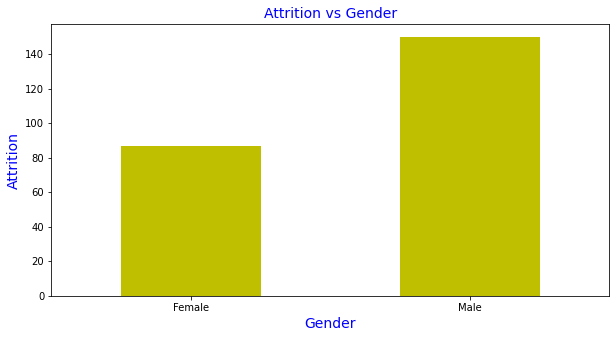

In [30]:
e.plot.bar(x = 'Gender', y = 'Attrition', figsize = (10,5), rot = 360, color = 'y', fontsize = 10)
plt.ylabel('Attrition',fontsize = 14, color = 'b')
plt.xlabel('Gender',fontsize = 14, color = 'b')
plt.title('Attrition vs Gender',fontsize = 14, color = 'b')
plt.show()

#### <font color = green>Above graph show Male has highest Attrition

### <font color = blue> Encode Gender column

In [31]:
df['Gender'] = le.fit_transform(df['Gender'])
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [32]:
df['Gender'].dtype

dtype('int32')

#### <font color = green>Gender column Encoded 

### <font color = blue> Education Field column

In [33]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [34]:
f = df.groupby('EducationField')['Attrition'].sum()
f

EducationField
Human Resources      7
Life Sciences       89
Marketing           35
Medical             63
Other               11
Technical Degree    32
Name: Attrition, dtype: int32

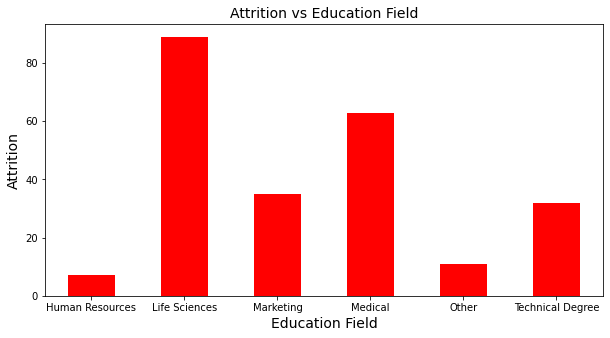

In [35]:
f.plot.bar(x = 'EducationField', y = 'Attrition', figsize = (10,5), rot = 360, color = 'r', fontsize = 10)
plt.ylabel('Attrition',fontsize = 14, color = 'black')
plt.xlabel('Education Field',fontsize = 14, color = 'black')
plt.title('Attrition vs Education Field',fontsize = 14, color = 'black')
plt.show()

#### <font color = green>Above graph show Life Science has highest Attrition and HR has lowest Attrition

### <font color = blue>Encode Education Field column

In [36]:
df['EducationField'] = le.fit_transform(df['EducationField'])
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [37]:
df['EducationField'].dtype

dtype('int32')

#### <font color = green> Education Field column Encoded

### <font color = blue> Job Role column

In [38]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [39]:
g = df.groupby('JobRole')['Attrition'].sum().sort_values()
g

JobRole
Research Director             2
Manager                       5
Healthcare Representative     9
Manufacturing Director       10
Human Resources              12
Sales Representative         33
Research Scientist           47
Sales Executive              57
Laboratory Technician        62
Name: Attrition, dtype: int32

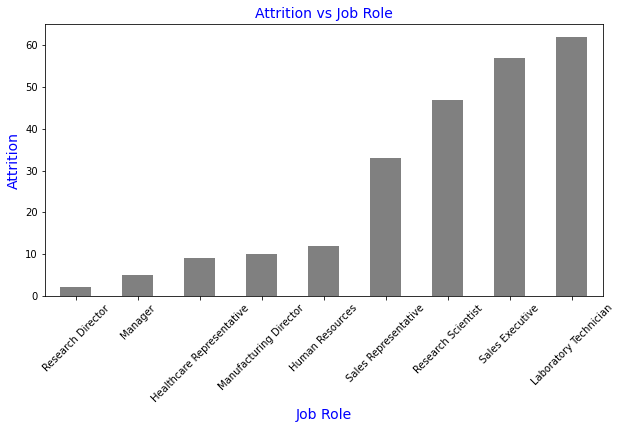

In [40]:
g.plot.bar(x = 'JobRole', y = 'Attrition', figsize = (10,5), rot = 45, color = 'gray', fontsize = 10)
plt.ylabel('Attrition',fontsize = 14, color = 'b')
plt.xlabel('Job Role',fontsize = 14, color = 'b')
plt.title('Attrition vs Job Role',fontsize = 14, color = 'b')
plt.show()

#### <font color = green>Above graph show Laboratory Technician has highest Attrition and Research Director has Lowest Attrition

### <font color = blue>Encode Job Role column

In [41]:
df['JobRole'] = le.fit_transform(df['JobRole'])
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [42]:
df['JobRole'].dtype

dtype('int32')

#### <font color = green>Job Role column Encoded

### <font color = blue>Marital Status column

In [43]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [44]:
h = df.groupby('MaritalStatus')['Attrition'].sum()
h

MaritalStatus
Divorced     33
Married      84
Single      120
Name: Attrition, dtype: int32

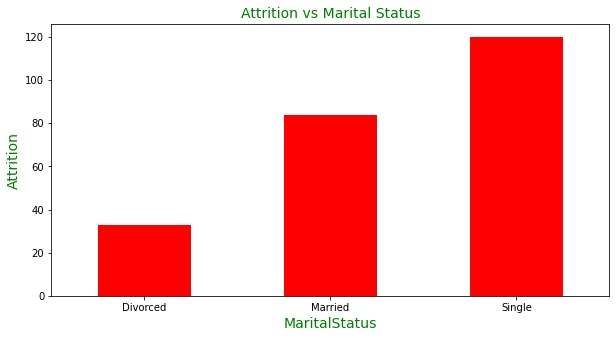

In [45]:
h.plot.bar(x = 'MaritalStatus', y = 'Attrition', figsize = (10,5), rot = 360, color = 'r', fontsize = 10)
plt.ylabel('Attrition',fontsize = 14, color = 'g')
plt.xlabel('MaritalStatus',fontsize = 14, color = 'g')
plt.title('Attrition vs Marital Status',fontsize = 14, color = 'g')
plt.show()

#### <font color = green>Above graph show Single Person has highest Attrition and Divorced Person has lowest Attrition

### <font color = blue>Encode Marital Status column

In [46]:
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [47]:
df['MaritalStatus'].dtype

dtype('int32')

#### <font color = green>Marital Status column Encoded

### <font color = blue>Monthly Income column

In [48]:
df['MonthlyIncome'].value_counts()

2342     4
6142     3
2610     3
2559     3
6347     3
        ..
4103     1
2705     1
6796     1
19717    1
10239    1
Name: MonthlyIncome, Length: 1349, dtype: int64

In [49]:
i = df.groupby('MonthlyIncome')['Attrition'].sum()
i

MonthlyIncome
1009     1
1051     0
1052     0
1081     1
1091     1
        ..
19859    1
19926    0
19943    0
19973    0
19999    0
Name: Attrition, Length: 1349, dtype: int32

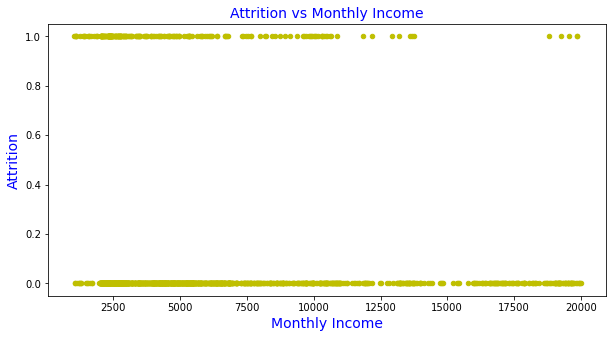

In [50]:
df.plot.scatter(x = 'MonthlyIncome', y = 'Attrition', figsize = (10,5), rot = 360, color = 'y', fontsize = 10)
plt.ylabel('Attrition',fontsize = 14, color = 'b')
plt.xlabel('Monthly Income',fontsize = 14, color = 'b')
plt.title('Attrition vs Monthly Income',fontsize = 14, color = 'b')
plt.show()

#### <font color = green>Above graph show which has 20000 Monthly Income lowest Attrition

### <font color = blue> Encode Over 18 column

In [51]:
df['Over18'] = le.fit_transform(df['Over18'])
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,No,23,4,4,80,1,10,3,3,10,7,1,7


In [52]:
df['Over18'].dtype

dtype('int32')

#### <font color = green>Over 18 column Encoded

### <font color = blue>Over Time column

In [53]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [54]:
j = df.groupby('OverTime')['Attrition'].sum()
j

OverTime
No     110
Yes    127
Name: Attrition, dtype: int32

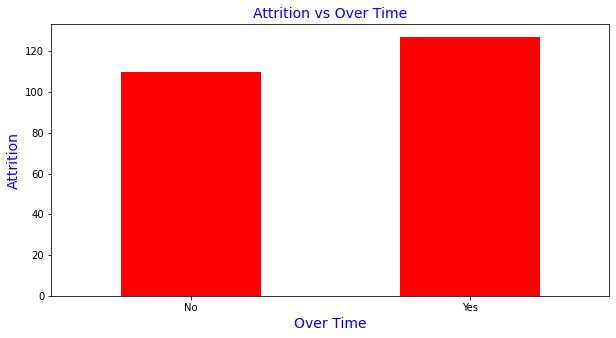

In [55]:
j.plot.bar(x = 'OverTime', y = 'Attrition', figsize = (10,5), rot = 360, color = 'r', fontsize = 10)
plt.ylabel('Attrition',fontsize = 14, color = 'b')
plt.xlabel('Over Time',fontsize = 14, color = 'b')
plt.title('Attrition vs Over Time',fontsize = 14, color = 'b')
plt.show()

#### <font color = green>Above graph show who work over time has highest Attrition

### <font color = blue>Encode Over Time column

In [56]:
df['OverTime'] = le.fit_transform(df['OverTime'])
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7


In [57]:
df['OverTime'].dtype

dtype('int32')

#### <font color = green>Over Time column Encoded

### <font color = blue>Information about dataset

In [58]:
print('----------------------------------------------------\n')
print(df.info())
print('\n----------------------------------------------------')

----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null

#### <font color = green>All columns are encoded and convert into integer

### <font color = blue>Data distribution and checking outliers

---------------------
Distribution Plot :- 
---------------------


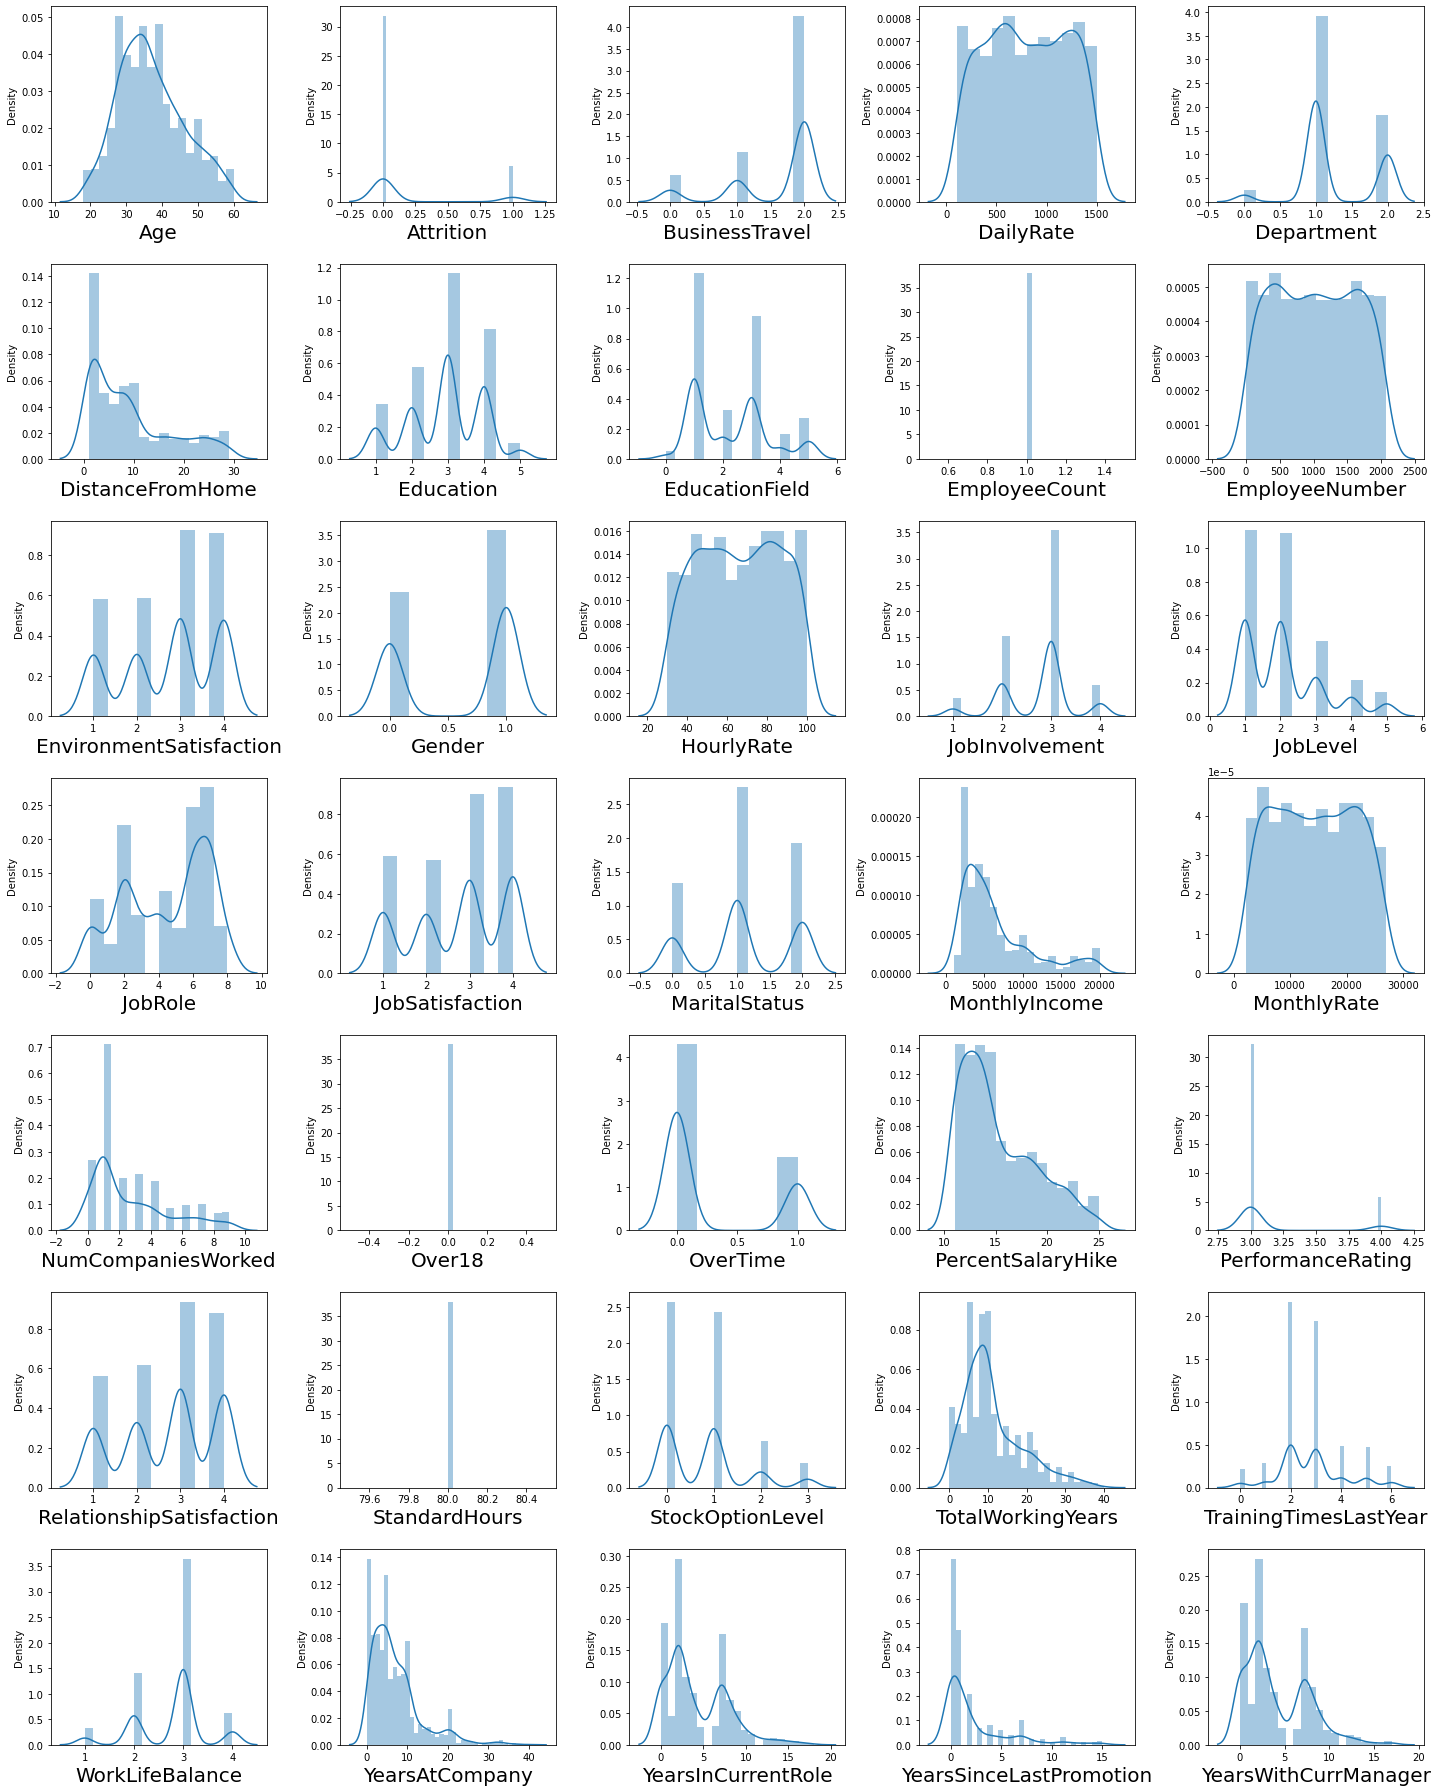

In [59]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=35:
        ax = plt.subplot(7,5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [60]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

#### <font color = green>Data has outliers and skewed

### <font color = blue> Corelation of Feature vs Label using Heat map

-----------
Heat Map :-
-----------


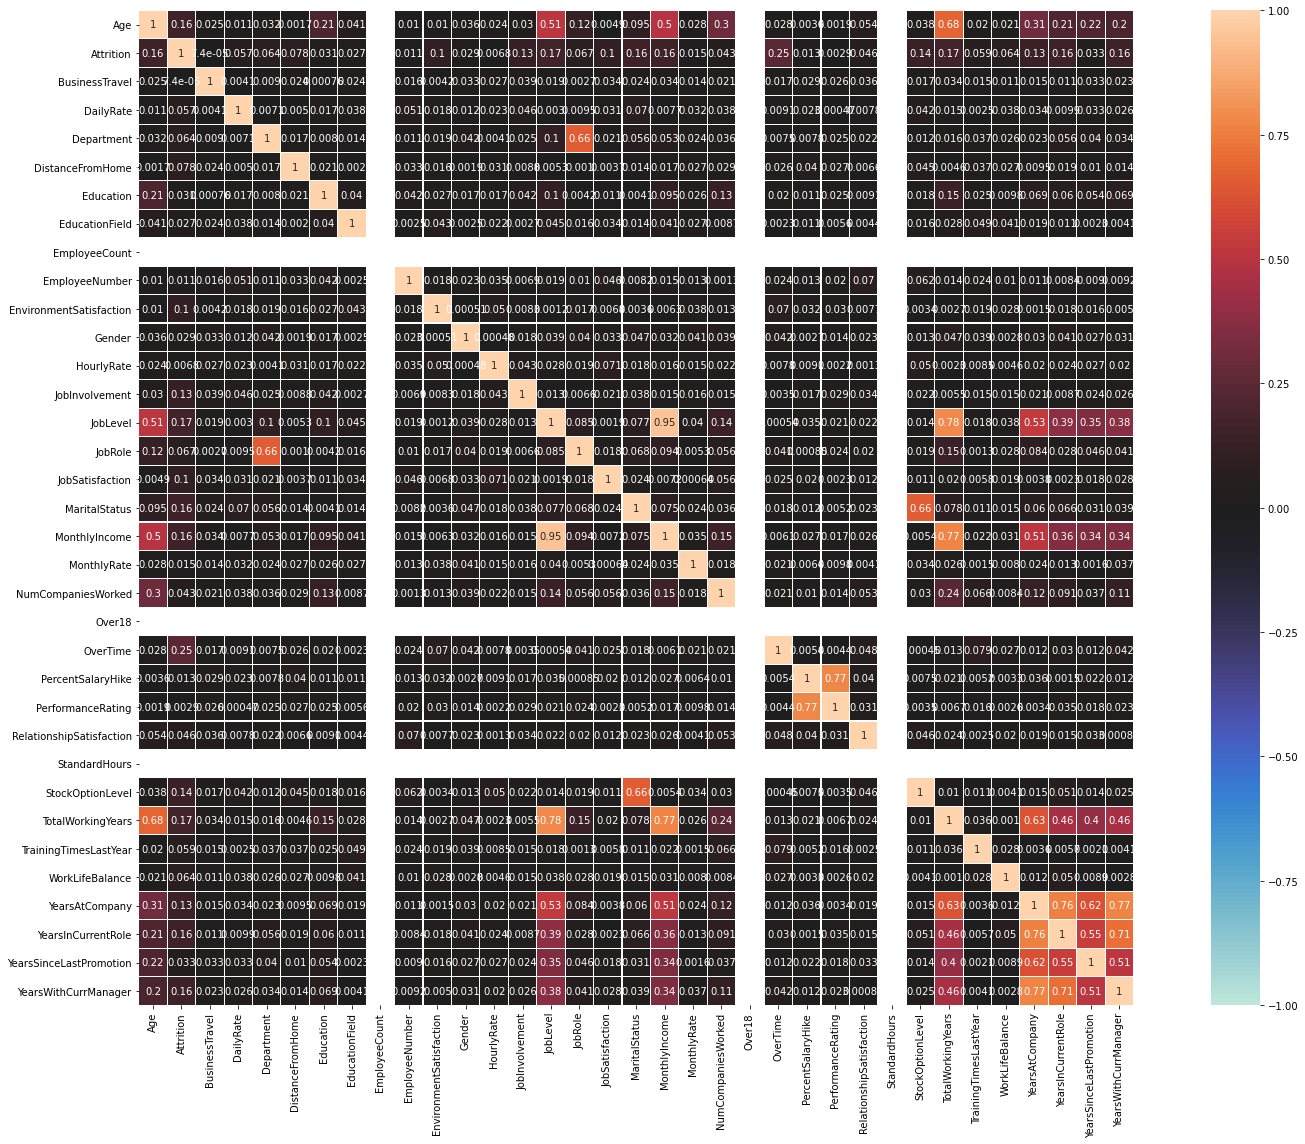

In [61]:
print('-----------')
print('Heat Map :-')
print('-----------')
df_corr = df.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1)
plt.tight_layout()

#### <font color = green>Job Level has highest and Age has lowest relation with label

### <font color = blue>Quntile metthod to removing outliers and skewness.

In [62]:
# we are removing the top 2% data from the BusinessTravel column
q = df['BusinessTravel'].quantile(0.98)
data_cleaned = df[df['BusinessTravel']<q]
# we are removing the top 2% data from the DistanceFromHome column
q = df['DistanceFromHome'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['DistanceFromHome']<q]
# we are removing the top 2% data from the JobLevel column
q = df['JobLevel'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['JobLevel']<q]
# we are removing the top 2% data from the MonthlyIncome column
q = df['MonthlyIncome'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['MonthlyIncome']<q]
# we are removing the top 2% data from the free NumCompaniesWorked column
q = df['NumCompaniesWorked'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['NumCompaniesWorked']<q]
# we are removing the top 2% data from the OverTime column
q = df['OverTime'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['OverTime']<q]
# we are removing the top 2% data from the PercentSalaryHike column
q = df['PercentSalaryHike'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['PercentSalaryHike']<q]
# we are removing the top 2% data from the PerformanceRating column
q = df['PerformanceRating'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['PerformanceRating']<q]
# we are removing the top 2% data from the StockOptionLevel column
q = df['StockOptionLevel'].quantile(0.98)
data_cleaned = df[df['StockOptionLevel']<q]
# we are removing the top 2% data from the TotalWorkingYears column
q = df['TotalWorkingYears'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['TotalWorkingYears']<q]
# we are removing the top 2% data from the YearsAtCompany column
q = df['YearsAtCompany'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['YearsAtCompany']<q]
# we are removing the top 2% data from the YearsInCurrentRole column
q = df['YearsInCurrentRole'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['YearsInCurrentRole']<q]


### <font color = blue> Checking Outliers and skewness removed or not


Box Plot :-



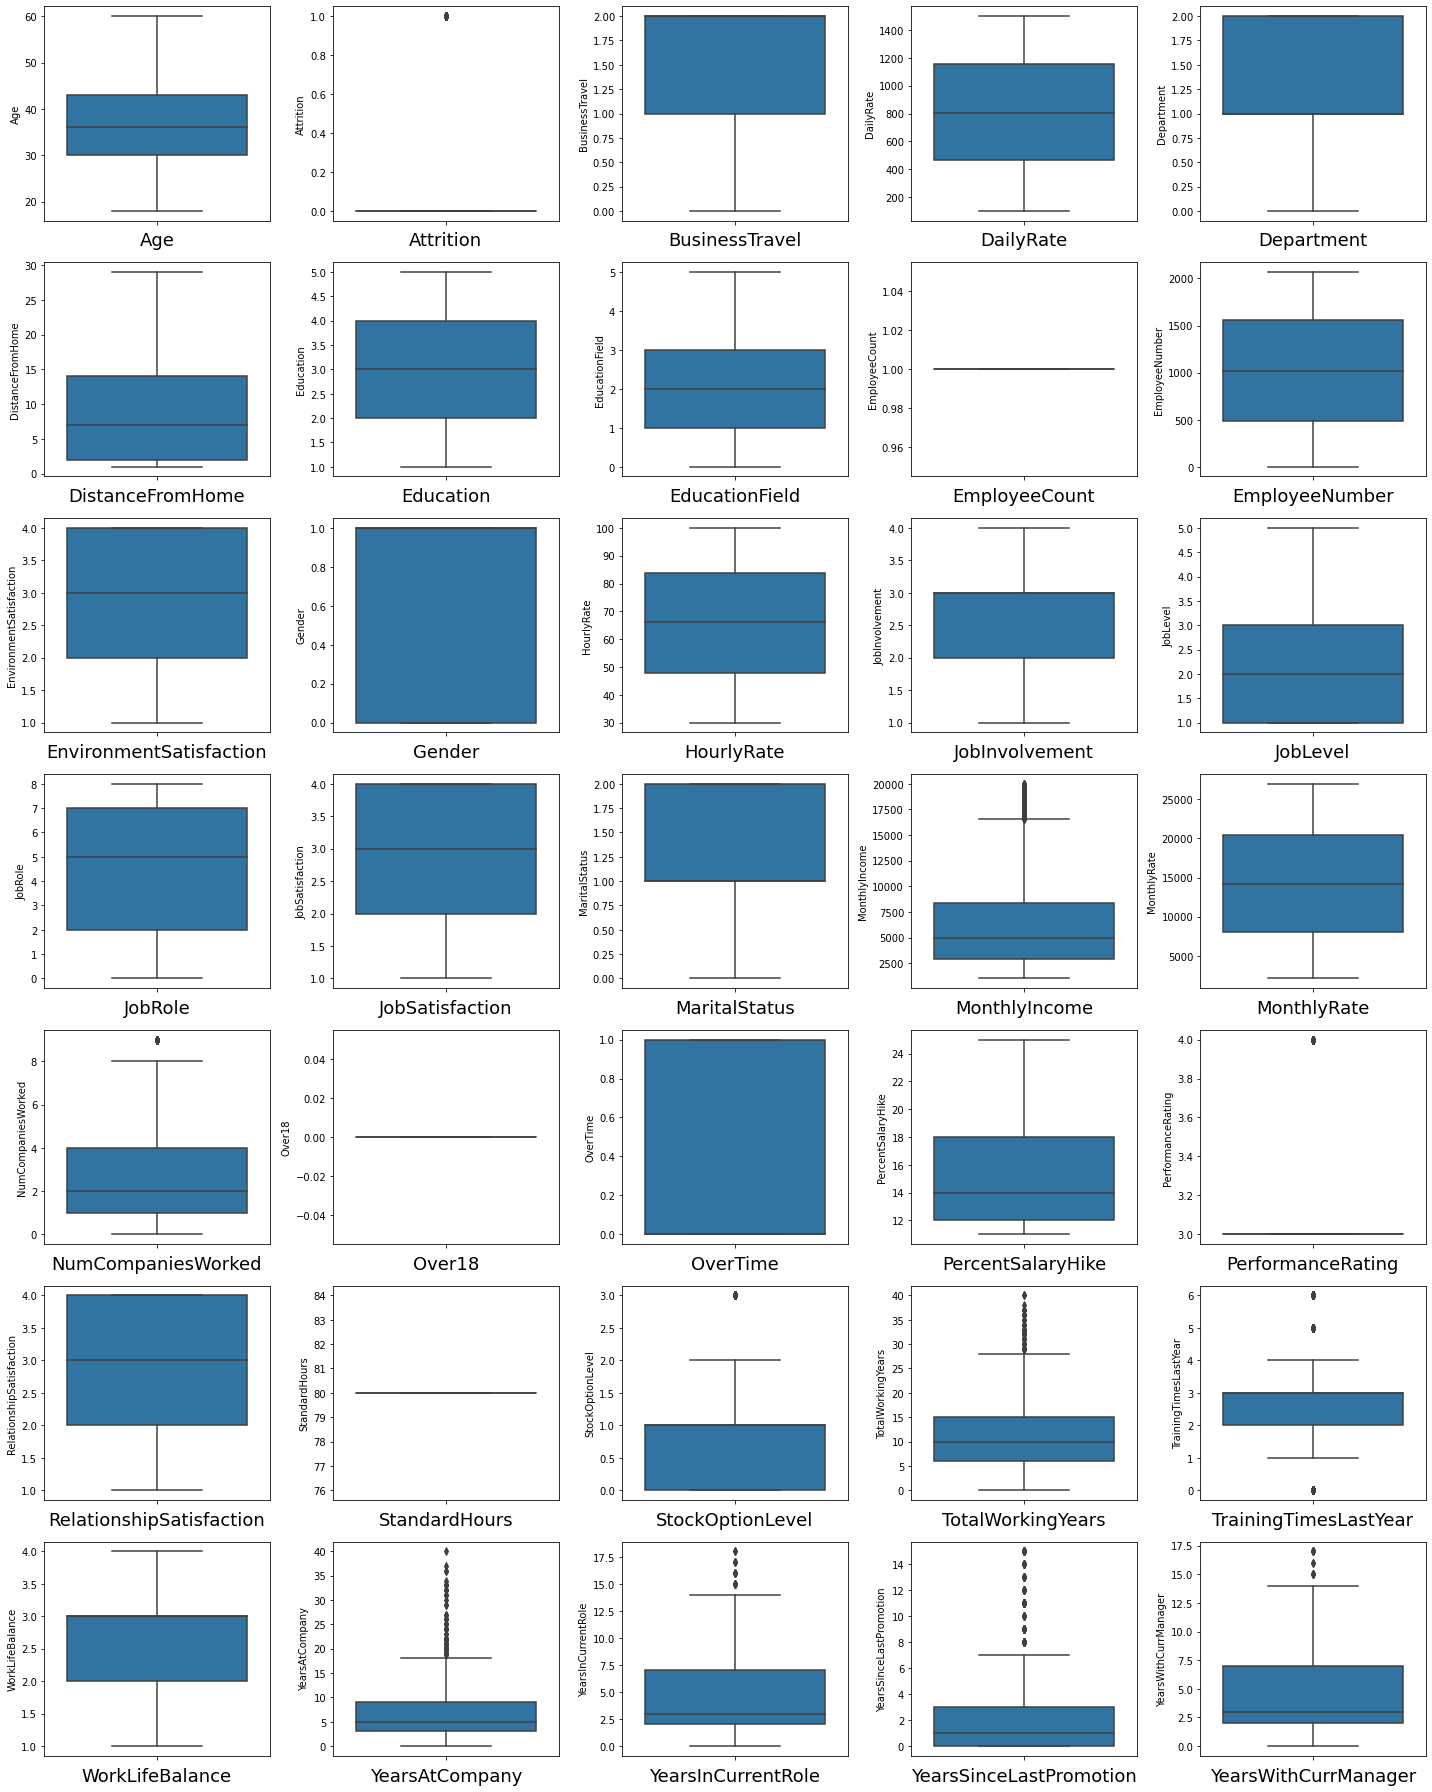

In [63]:
# Let' see outliers are removed in columns or not.
print('\nBox Plot :-\n')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=35:
        ax = plt.subplot(7,5, plotnumber)
        sns.boxplot(y=df[column]) # It is the axis for vertical set as y
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

---------------------
Distribution Plot :- 
---------------------


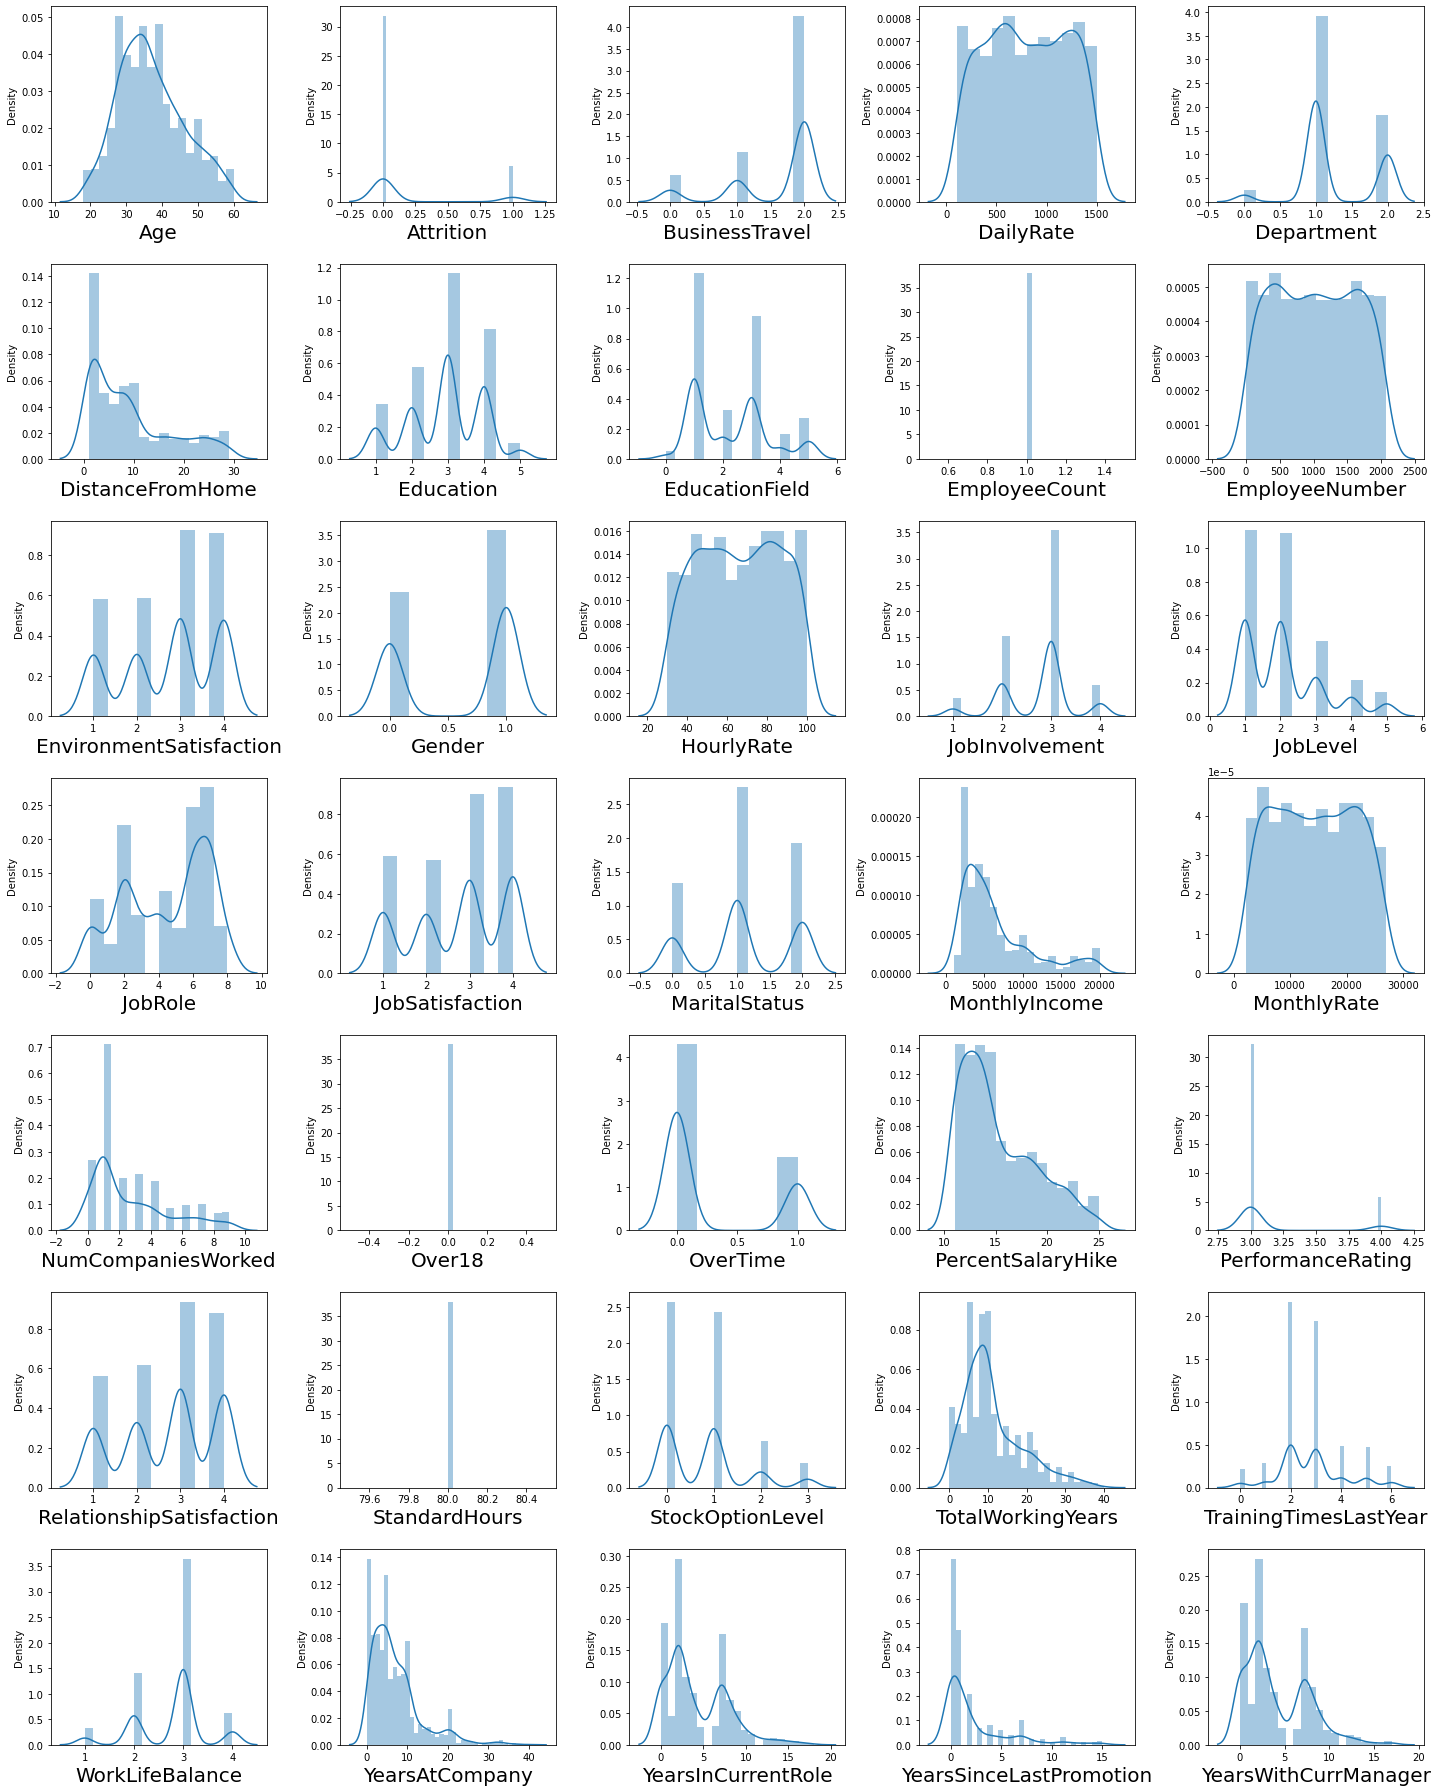

In [64]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=35:
        ax = plt.subplot(7,5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### <font color = green>Outliers are removed

### <font color = blue> Spliting Dataset into features and labels

In [65]:
x = df.drop('Attrition', axis = 1)
y = df. Attrition
print('Data has been splited')

Data has been splited


------------------------
Scatter Plot :-
------------------------


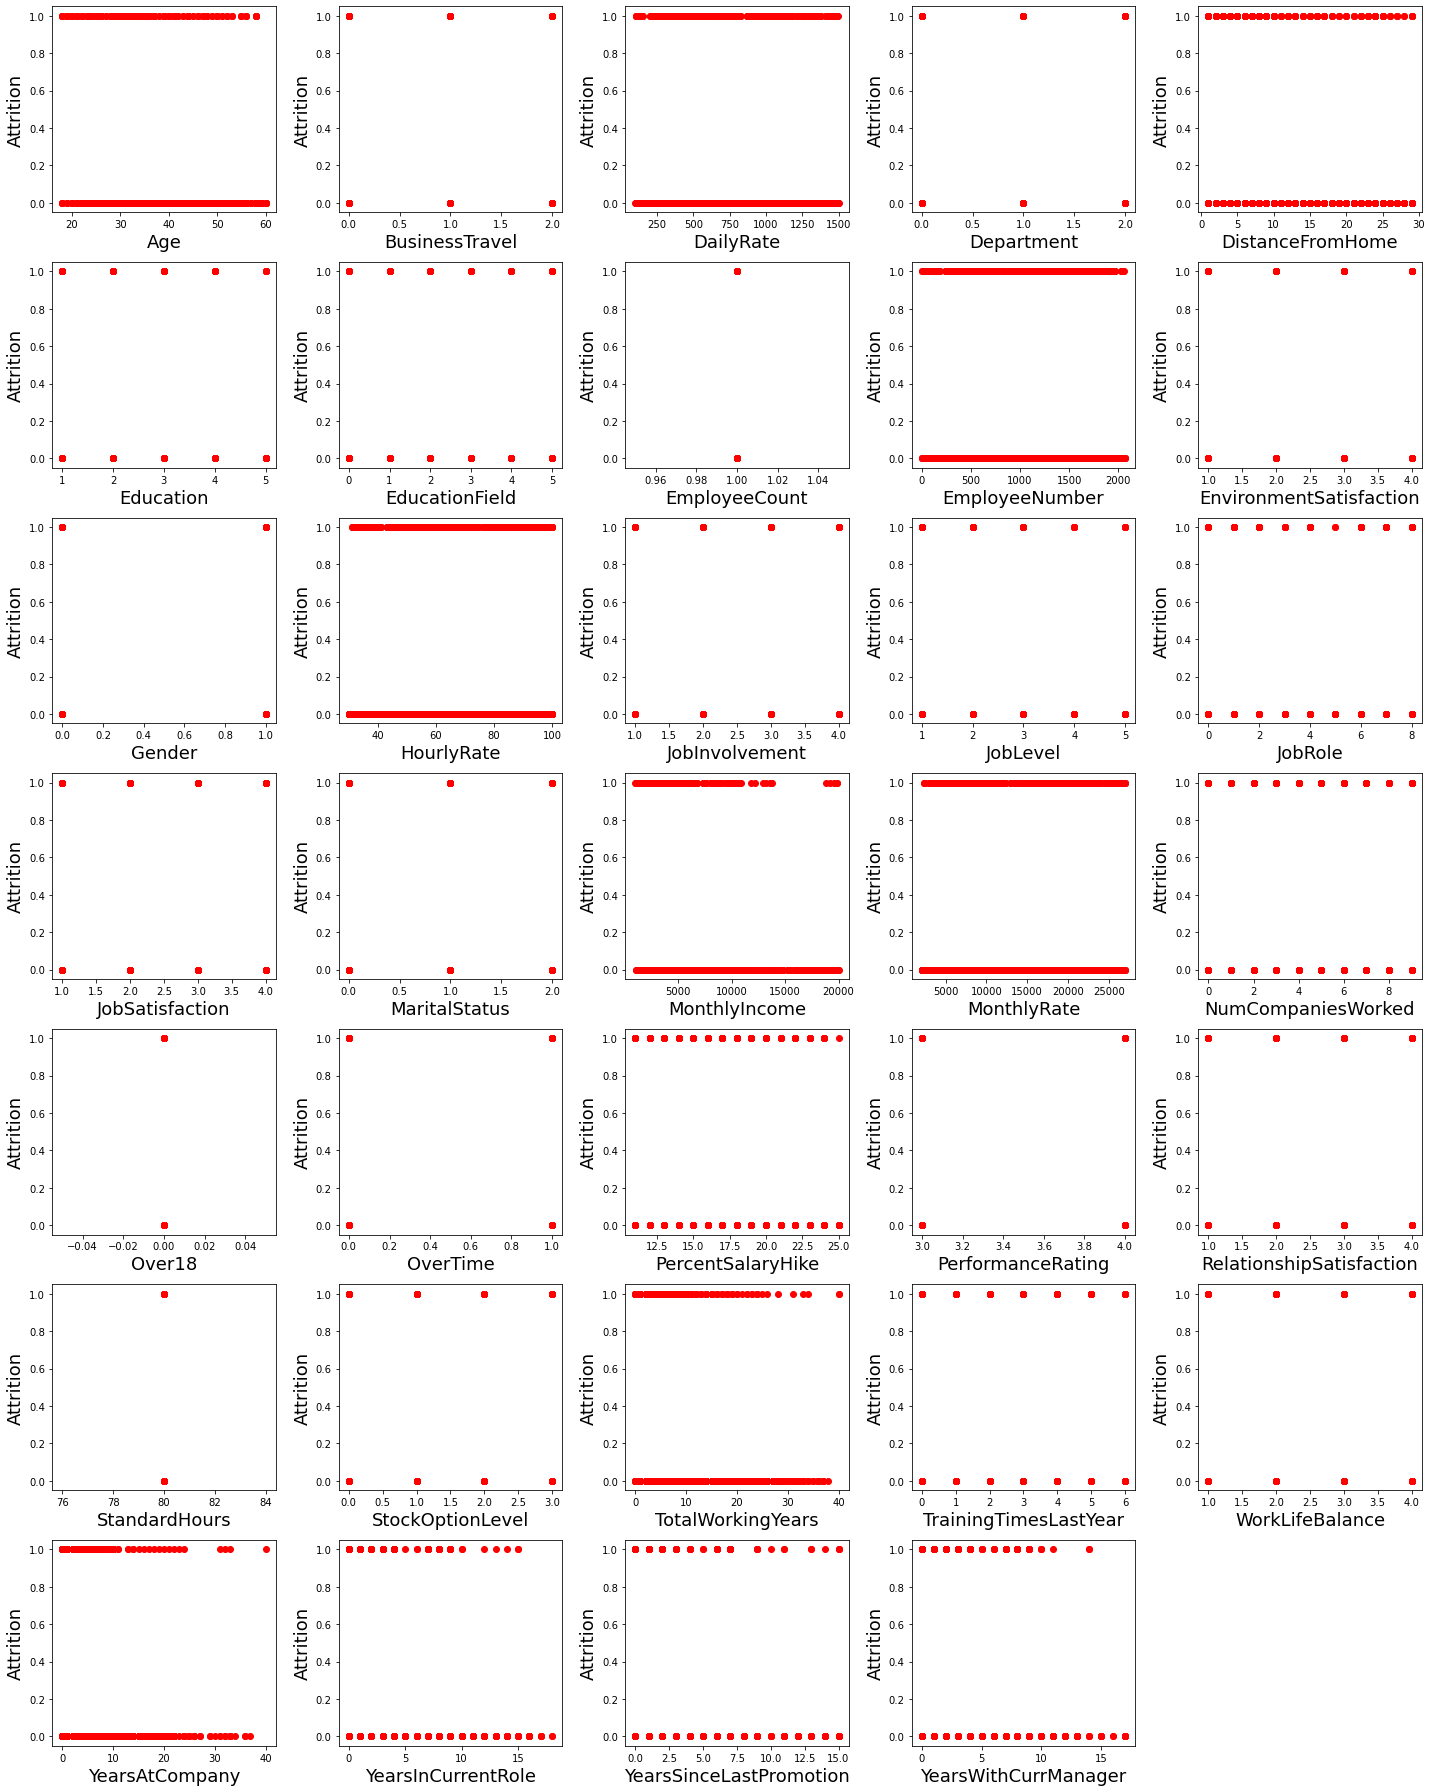

In [66]:
# Let' see relation between features and labels.
print('------------------------')
print('Scatter Plot :-')
print('------------------------')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=35:
        ax = plt.subplot(7,5, plotnumber)
        plt.scatter(x[column],y, c = 'r')
        plt.xlabel(column, fontsize = 18)
        plt.ylabel('Attrition', fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### <font color = green>Features are related to label

### <font color = blue>Handling class imbalance

In [67]:
sm = SMOTE()
x_over, y_over = sm.fit_resample(x, y)

In [68]:
y_over.value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

### <font color = blue>Data Scaling

In [69]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

### <font color = blue>Split data into train and test. Model will be bulit on training data and tested on test data

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## <font color = blue>Model Building

### <font color = blue>Decision Tree model instantiaing, training and evaluating

In [71]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [72]:
print('--------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

--------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       303
           1       0.82      0.81      0.81       314

    accuracy                           0.81       617
   macro avg       0.81      0.81      0.81       617
weighted avg       0.81      0.81      0.81       617

------------------------------------------------------------



#### <font color = green>Conclusion : Decision Tree model has 81% score

### <font color = blue> Cross Validation score to check if the model is overfitting

In [73]:
cv = cross_val_score(DT, x, y, cv = 5)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 0.7680272108843538


#### <font color = green>Conclusion : Decision Tree model has 76% Cross Validation score

### <font color = blue>Knn model instantiaing, training and evaluating

In [74]:
Knn = KNeighborsClassifier()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)

In [75]:
print('--------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

--------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       303
           1       0.73      0.91      0.81       314

    accuracy                           0.78       617
   macro avg       0.80      0.78      0.78       617
weighted avg       0.80      0.78      0.78       617

------------------------------------------------------------



#### <font color = green>Conclusion : Knn model has 78% score

### <font color = blue>Cross Validation score to check if the model is overfitting

In [76]:
cv = cross_val_score(Knn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.8210884353741497


#### <font color = green>Conclusion : Knn model has 82% Cross Validation score

### <font color = blue> Random Forest model instantiaing, training and evaluating

In [77]:
Rn = RandomForestClassifier()
Rn.fit(x_train, y_train)
y_pred = Rn.predict(x_test)

In [78]:
print('--------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

--------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       303
           1       0.93      0.86      0.89       314

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617

------------------------------------------------------------



#### <font color = green> Conclusion : Random Forest model has 90% score

### <font color = blue>Cross Validation score to check if the model is overfitting

In [79]:
cv = cross_val_score(Rn, x, y, cv = 5)
print('Cross Validation score of Random Forest model --->', cv.mean())

Cross Validation score of Random Forest model ---> 0.858503401360544


#### <font color = green>Conclusion : Random Forest model has 85% Cross Validation score

### <font color = blue>XGBoost model instantiaing, training and evaluating

In [80]:
xgb = xgb.XGBClassifier(eval_metric='mlogloss')
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [81]:
print('--------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

--------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       303
           1       0.92      0.90      0.91       314

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617

------------------------------------------------------------



#### <font color = green> Conclusion : XGB model has 93% score

### <font color = blue>Cross Validation score to check if the model is overfitting

In [82]:
cv = cross_val_score(xgb, x, y, cv = 5)
print('Cross Validation score of XGB model --->', cv.mean())

Cross Validation score of XGB model ---> 0.8605442176870749


#### <font color = green>Conclusion : XGB model has 86% Cross Validation score

### <font color = blue>SVM model instantiaing, training and evaluating

In [83]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [84]:
print('--------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

--------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.52      0.58       303
           1       0.61      0.73      0.67       314

    accuracy                           0.63       617
   macro avg       0.63      0.63      0.62       617
weighted avg       0.63      0.63      0.62       617

------------------------------------------------------------



#### <font color = green>Conclusion : SVM model has 63% score

### <font color = blue>Cross Validation score to check if the model is overfitting

In [85]:
cv = cross_val_score(svm, x, y, cv = 5)
print('Cross Validation score of SVM model --->', cv.mean())

Cross Validation score of SVM model ---> 0.8387755102040817


#### <font color = green>Conclusion : SVM model has 83% Cross Validation score

### <font color = blue>Let's find ROC, AUC score

In [86]:
# RandomForestClassifier
roc_auc_score(y_test, Rn.predict(x_test))

0.896933005402451

In [87]:
# KNeighborsClassifier
roc_auc_score(y_test, Knn.predict(x_test))

0.7804965209896786

In [88]:
# DecisionTreeClassifier
roc_auc_score(y_test, DT.predict(x_test))

0.8103991927855206

In [89]:
# XGBoostClassifier
roc_auc_score(y_test, xgb.predict(x_test))

0.9126831472956213

In [90]:
# SVMClassifier
roc_auc_score(y_test, svm.predict(x_test))

0.6253757541359231

### <font color = blue>Let's check ROC, AUC Curve for the fitted model

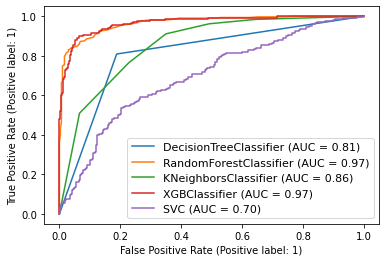

In [91]:
dis = plot_roc_curve(DT, x_test, y_test)
plot_roc_curve(Rn, x_test, y_test, ax = dis.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve(Knn, x_test, y_test, ax = dis.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = dis.ax_)
plot_roc_curve(svm, x_test, y_test, ax = dis.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

#### <font color = green>Above plot shows Random Forest is best model.

### <font color = blue>Looking ROC, AUC Curve we found Random Forest has best model so we do Hyperparameter Tuning on it.

In [112]:
param = {'n_estimators': [50,100,750], 'max_depth': range(2, 20, 3), 'min_samples_split':[5], 
              'min_samples_leaf' : [1]}

In [113]:
grid_search = GridSearchCV(estimator = Rn, param_grid = param, cv = 5 , n_jobs = -1)

In [114]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3), 'min_samples_leaf': [1],
                         'min_samples_split': [5],
                         'n_estimators': [50, 100, 750]})

In [115]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [116]:
hRn = RandomForestClassifier(min_samples_leaf = 1, max_depth = 17 , min_samples_split = 5, n_estimators = 50)
hRn.fit(x_train, y_train)
hRn.score(x_test, y_test)

0.899513776337115

In [117]:
y_pred = hRn.predict(x_test)

In [118]:
print('--------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

--------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       303
           1       0.92      0.88      0.90       314

    accuracy                           0.90       617
   macro avg       0.90      0.90      0.90       617
weighted avg       0.90      0.90      0.90       617

------------------------------------------------------------



#### <font color = green>After Hyperparameter Tuning model accuracy score increase to 90%.

### <font color = blue>Saving The Model

In [119]:
# saving the model to the Local file system
filename = 'HR Analytics Project.pickle'
pickle.dump(hRn, open(filename, 'wb'))

## <font color = green>Final Conclusion : Random Forest is our best model.